# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2381 Ивашинников Леонид Дмитриевич и Двиков Даниил Владиславович. Вариант №7.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения

Входной сигнал:
$$s(t)=\sum^M_{m=1}c_me^{i\omega_mt}$$
Выходной сигнал:
$$y(t)=\sum^M_{m=1}c_mH(\omega_m)e^{i\omega_mt}$$
Необходимое условие для МНК:
$$F(y_k)=\sum^k_{-k}(s_k-y_k)^2\rightarrow\min$$
Формула для вычисления передаточной функции рекурсивного фильтра $y_n$ дискретного сигнала $x_n$:
$$H(\omega)=\frac{y_n}{x_n}$$
Связь передаточной функции для круговой частоты и циклической:
$$H(\omega)=H(2\pi f)=\tilde{H}(f)$$
Перевод значений передаточной функции в логарифмическую шкалу:
$$1dB=20\lg\left(\left|\frac{y_n}{s_n}\right|\right)=20\lg\left(\left|H(\omega)\right|\right)$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math

# Циклическая и круговая частоты
F = np.arange(0, 0.5, 0.0003)
W = [2 * math.pi * f for f in F]

1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал:
$$s(t)$$
Выходной сигнал:
$$y(t)=A+Bt$$
Приближение методом МНК прямой линием по трём точкам:
$$F(A,B)=\sum^{k=1}_{k=-1}(s_k-y_k)^2=\sum^{k=1}_{k=-1}(s_k-A-Bk)^2\Rightarrow\min$$
Берём частные производые по $A$ и $B$ и получаем систему нормальных уравнений:
$$\begin{cases}
3A+0B=\sum^{k=1}_{k=-1}s_k\\
0A+2B=\sum^{k=1}_{k=-1}ks_k
\end{cases}$$
В итоге получаем:
$$y_0=A=\frac{1}{3}\sum^{k=1}_{k=-1}s_k=\frac{1}{3}(s_{-1}+s_0+s_1)$$
В общем случае:
$$y_n=\frac{1}{3}\sum^{k=n+1}_{k=n-1}s_k=\frac{1}{3}(s_{n-1}+s_n+s_{n+1})$$
Пусть $s_n=e^{i\omega n}$, тогда
$$y_n=\frac{1}{3}(e^{-i\omega}+1+e^{i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$
$$H(\omega)=\frac{1}{3}(e^{-i\omega}+1+e^{i\omega})=\frac{1}{3}(1+2\cos(\omega))$$


Для пяти точек:
$$H(\omega)=\frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})=\frac{1}{5}(1+2\cos(\omega)+2\cos(2\omega))$$

Для семи точек:
$$H(\omega)=\frac{1}{7}(e^{-3i\omega}+e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega}+e^{3i\omega})=\frac{1}{7}(1+2\cos(\omega)+2\cos(2\omega)+2\cos(3\omega))$$

Для девяти точек:
$$H(\omega)=\frac{1}{9}(e^{-4i\omega}+e^{-3i\omega}+e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega}+e^{3i\omega}+e^{4i\omega})=\frac{1}{9}(1+2\cos(\omega)+2\cos(2\omega)+2\cos(3\omega)+2\cos(4\omega))$$


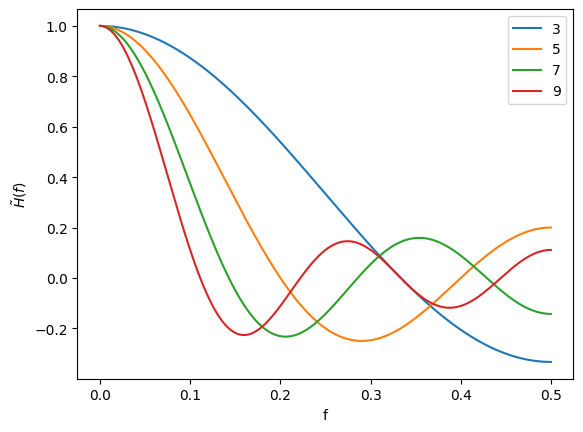

In [37]:
poly_1 = {
    3: [1 / 3 * (1 + 2 * np.cos(w)) for w in W],
    5: [1 / 5 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w)) for w in W],
    7: [1 / 7 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w) + 2 * np.cos(3 * w)) for w in W],
    9: [1 / 9 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w) + 2 * np.cos(3 * w) + 2 * np.cos(4 * w)) for w in W]
}

plt.figure()
for k, v in poly_1.items():
  plt.plot(F, v, label=f'{k}')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()

При увеличении числа точек передаточная функция имеет более резкий спад и сильнее подавляет высокие частоты, но при этом становится более восприимчивой к ним и может вызывать искажения сигнала.

2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выходной сигнал:
$$y(t)=A+Bt+Ct^2$$
Воспользуемся МНК для нахождения A, B, C. Рассмотрим для семи точек:
$$F(A,B,C)=\sum^{k=3}_{k=-3}(s_k-y_k)^2=\sum^{k=3}_{k=-3}(s_k-A-Bk-Ck^2)^2$$
Берём частные производные по $A$, $B$ и $C$ и получаем систему нормальных уравнений:
$$\begin{cases}
7A+28C=\sum^{k=3}_{k=-3}s_k\\
28B=\sum^{k=3}_{k=-3}ks_k\\
28A+196C=\sum^{k=3}_{k=-3}k^2s_k\\
\end{cases}$$
Вычтем первое уравнение, умноженное на 7, из третьего:
$$-21A=2s_{-3}-3s_{-2}-6s_{-1}-7s_0-6s_1-3s_2+2s_3$$
Получаем:
$$y_0=A=\frac{1}{21}(-2s_{-3}+3s_{-2}+6s_{-1}+7s_0+6s_1+3s_2-2s_3)$$
В общем случае:
$$y_n=\frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_n+6s_{n+1}+3s_{n+2}-2s_{n+3})$$
Пусть $s_n=e^{i\omega n}$, тогда:
$$y_n=\frac{1}{21}(-2e^{-3i\omega}+3e^{-2i\omega}+6e^{-i\omega}+7+6e^{i\omega}+3e^{2i\omega}-2e^{3i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$
Значит:
$$H(\omega)=\frac{1}{21}(-2e^{-3i\omega}+3e^{-2i\omega}+6e^{-i\omega}+7+6e^{i\omega}+3e^{2i\omega}-2e^{3i\omega})=\frac{1}{21}(7+12\cos(\omega)+6\cos(2\omega)-4\cos(3\omega))$$


Для девяти точек:
$$H(\omega)=\frac{1}{231}(59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega))$$
Для одиннадцати точек:
$$H(\omega)=\frac{1}{429}(89+168\cos(\omega)+138\cos(2\omega)+88\cos(3\omega)+18\cos(4\omega)-72\cos(5\omega))$$
Для тринадцати точек:
$$H(\omega)=\frac{1}{143}(25+48\cos(\omega)+42\cos(2\omega)+32\cos(3\omega)+18\cos(4\omega)-22\cos(6\omega))$$

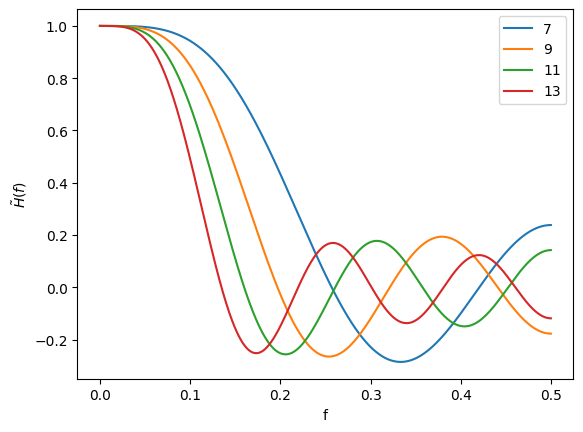

In [38]:
poly_2 = {
    7: [1 / 21 * (7 + 12 * np.cos(w) + 6 * np.cos(2 * w) - 4 * np.cos(3 * w)) for w in W],
    9: [1 / 231 * (59 + 108 * np.cos(w) + 78 * np.cos(2 * w) + 28 * np.cos(3 * w) - 42 * np.cos(4 * w)) for w in W],
    11: [1 / 429 * (89 + 168 * np.cos(w) + 138 * np.cos(2 * w) + 88 * np.cos(3 * w) + 18 * np.cos(4 * w) - 72 * np.cos(5 * w)) for w in W],
    13: [1 / 143 * (25 + 48 * np.cos(w) + 42 * np.cos(2 * w) + 32 * np.cos(3 * w) + 18 * np.cos(4 * w) - 22 * np.cos(6 * w)) for w in W]
}

plt.figure()
for k, v in poly_2.items():
  plt.plot(F, v, label=f'{k}')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()

По сравнению с предыдущим фильтром увеличилась полоса пропускания и частота колебаний на высоких частотах. При увеличении количества точек передаточная функция сильнее подавляет высокие частоты и становится более восприимчивой к ним и может вызывать искажения сигнала.

3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выходной сигнал:
$$y(t)=A+Bt+Ct^2+Dt^3+Et^4$$
Воспользуемся МНК для нахождения $A$, $B$, $C$, $D$ и $E$. Рассмотрим для девяти точек:
$$F(A,B,C,D,E)=\sum^{k=4}_{k=-4}(s_k-y_k)^2=\sum^{k=4}_{k=-4}(s_k-A-Bk-Ck^2-Dk^3-Ek^4)^2$$
Берём частные производные по $A$, $B$, $C$, $D$, $E$ и получаем систему нормальных уравнений:
$$\begin{cases}
9A+60C+708E=\sum^{k=4}_{k=-4}s_k\\
60B+708D=\sum^{k=4}_{k=-4}ks_k\\
60A+708C+9780E=\sum^{k=4}_{k=-4}k^2s_k\\
708B+9780D=\sum^{k=4}_{k=-4}k^3s_k\\
708A+9780C+144708E=\sum^{k=4}_{k=-4}k^4s_k\\
\end{cases}$$
В итоге получаем:
$$y_0=A=\frac{1}{429}(15s_{-4}-55s_{-3}+30s_{-2}+135s_{-1}+179s_0+135s_1+30s_2-55s_3+15s_4)$$
В общем случае:
$$y_n=\frac{1}{429}(15s_{n-4}-55s_{n-3}+30s_{n-2}+135s_{n-1}+179s_n+135s_{n+1}+30s_{n+2}-55s_{n+3}+15s_{n+4})$$
Пусть $s_n=e^{i\omega n}$, тогда:
$$y_n=\frac{1}{429}(15e^{-4i\omega}-55e^{-3i\omega}+30e^{-2i\omega}+135^{-i\omega}+179+135e^{i\omega}+30e^{2i\omega}-55e^{3i\omega}+15e^{4i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$
Значит:
$$H(\omega)=\frac{1}{429}(179+270\cos(\omega)+60\cos(2\omega)-110\cos(3\omega)+30\cos(4\omega))$$


Для одиннадцати точек:
$$H(\omega)=\frac{1}{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36\cos(5\omega))$$
Для тринадцати точек:
$$H(\omega)=\frac{1}{2431}(677+1200\cos(\omega)+780\cos(2\omega)+220\cos(3\omega)-270\cos(4\omega)-396\cos(5\omega)+220\cos(6\omega))$$
Для пятнадцати точек:
$$H(\omega)=\frac{1}{46189}(11063+20250\cos(\omega)+15000\cos(2\omega)+7510\cos(3\omega)-330\cos(4\omega)-5874\cos(5\omega)-5720\cos(6\omega)+4290\cos(7\omega))$$

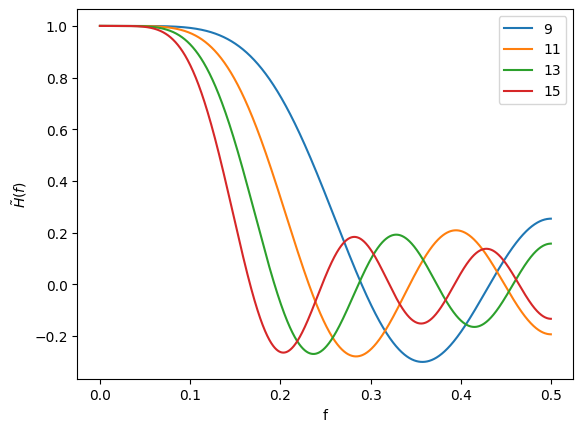

In [39]:
poly_4 = {
    9: [1 / 429 * (179 + 270 * np.cos(w) + 60 * np.cos(2 * w) - 110 * np.cos(3 * w) + 30 * np.cos(4 * w)) for w in W],
    11: [1 / 429 * (143 + 240 * np.cos(w) + 120 * np.cos(2 * w) - 20 * np.cos(3 * w) - 90 * np.cos(4 * w) + 36 * np.cos(5 * w)) for w in W],
    13: [1 / 2431 * (677 + 1200 * np.cos(w) + 780 * np.cos(2 * w) + 220 * np.cos(3 * w) - 270 * np.cos(4 * w) - 396 * np.cos(5 * w) + 220 * np.cos(6 * w)) for w in W],
    15: [1 / 46189 * (11063 + 20250 * np.cos(w) + 15000 * np.cos(2 * w) + 7510 * np.cos(3 * w) - 330 * np.cos(4 * w) - 5874 * np.cos(5 * w) - 5720 * np.cos(6 * w) + 4290 * np.cos(7 * w)) for w in W]
}

plt.figure()
for k, v in poly_4.items():
  plt.plot(F, v, label=f'{k}')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()

По сравнению с предыдущим фильтром полоска пропускания увеличилась. При увеличении количества точек передаточная функция имеет более резкий спад, высокие частоты подавляются сильнее. Функция становится более восприимчивой к ним и это может вызывать искажения сигнала.

4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Формулы Спенсера для пятнадцати точек:
$$y_n=\frac{1}{320}(-3s_{n-7}-6s_{n-6}-5s_{n-5}+3s_{n-4}+21s_{n-3}+46s_{n-2}+67s_{n-1}+74s_n+67s_{n+1}+46s_{n+2}+21s_{n+3}+3s_{n+4}-5s_{n+5}-6s_{n+6}-3s_{n+7})$$
Для двадцати одной точки:
$$y_n=\frac{1}{350}(-s_{n-10}-3s_{n-9}-5s_{n-8}-5s_{n-7}-2s_{n-6}+6s_{n-5}+18s_{n-4}+33s_{n-3}+47s_{n-2}+57s_{n-1}+60s_n+57s_{n+1}+47s_{n+2}+33s_{n+3}+18s_{n+4}+6s_{n+5}-2s_{n+6}-5s_{n+7}-5s_{n+8}-3s_{n+9}-s_{n+10})$$
Значит, для пятнадцати:
$$H(\omega)=\frac{1}{320}(74+134\cos(\omega)+92\cos(2\omega)+42\cos(3\omega)+6\cos(4\omega)-10\cos(5\omega)-12\cos(6\omega)-6\cos(7\omega))$$
и для двадцати одной:
$$H(\omega)=\frac{1}{350}(60+114\cos(\omega)+94\cos(2\omega)+66\cos(3\omega)+36\cos(4\omega)+12\cos(5\omega)-4\cos(6\omega)-10\cos(7\omega)-10\cos(8\omega)-6\cos(9\omega)-2\cos(10\omega))$$

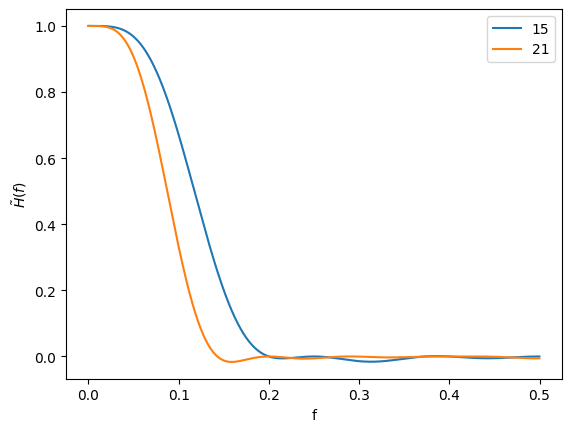

In [40]:
spencer = {
    15: [1 / 320 * (74 + 134 * np.cos(w) + 92 * np.cos(2 * w) + 42 * np.cos(3 * w) + 6 * np.cos(4 * w) - 10 * np.cos(5 * w) - 12 * np.cos(6 * w) - 6 * np.cos(7 * w)) for w in W],
    21: [1 / 350 * (60 + 114 * np.cos(w) + 94 * np.cos(2 * w) + 66 * np.cos(3 * w) + 36 * np.cos(4 * w) + 12 * np.cos(5 * w) - 4 * np.cos(6 * w) - 10 * np.cos(7 * w) - 10 * np.cos(8 * w) - 6 * np.cos(9 * w) - 2 * np.cos(10 * w)) for w in W]
}

plt.figure()
for k, v in spencer.items():
  plt.plot(F, v, label=f'{k}')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$')
plt.legend()

Аналогично предыдущим пунктам, при увеличении количества точек передаточная функция имеет более резкий спад. При этом функции имеют небольшую полосу пропускания и полностью подавляют высокие частоты.

5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

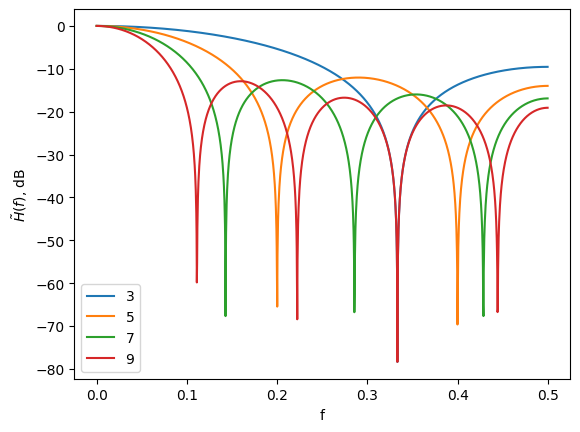

In [41]:
plt.figure()
for k, v in poly_1.items():
  plt.plot(F, [20 * math.log10(abs(h)) for h in v], label=f'{k}')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.legend()

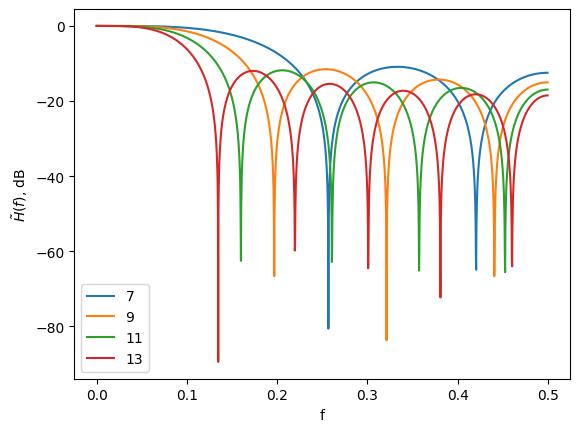

In [42]:
plt.figure()
for k, v in poly_2.items():
  plt.plot(F, [20 * math.log10(abs(h)) for h in v], label=f'{k}')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.legend()

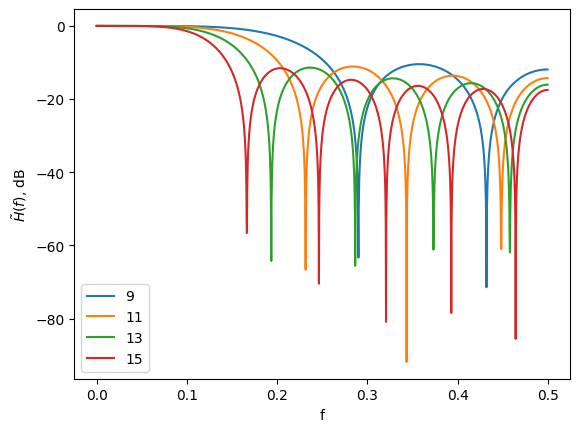

In [43]:
plt.figure()
for k, v in poly_4.items():
  plt.plot(F, [20 * math.log10(abs(h)) for h in v], label=f'{k}')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.legend()

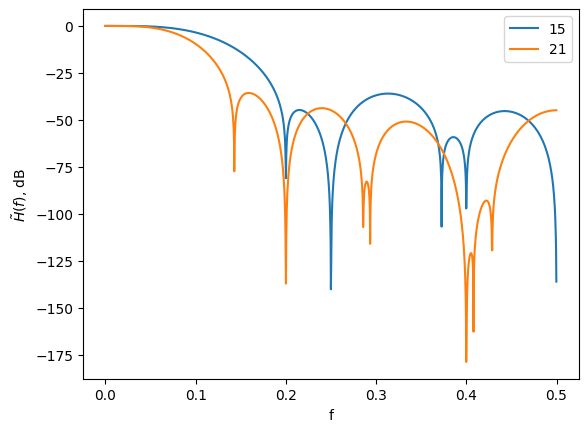

In [44]:
plt.figure()
for k, v in spencer.items():
  plt.plot(F, [20 * math.log10(abs(h)) for h in v], label=f'{k}')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.legend()

На линейных графиках хорошо видно основные характеристики фильтра: полоса пропускания, колебания амплитуды.

В логарифмической шкале основной акцент на диапазоне затухания и полосе подавления фильтра. Это позволяет лучше оценить эффективность фильтрации высоких частот.

6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Все рассмотренные полиноминальные фильтры подавляют высокие частоты, имеют резкий спад. Эта тенденция усиливается при увеличении количества точек. С увеличением степени полинома также увеличивается полоса пропускания и амплитуда колебаний на высоких частотах. В фильтре Спенсера колебания на высоких частотах практически отсутствуют.

## Выводы

Были рассмотрены нерекурсивные фильтры, соответствующие сглаживанию прямой линией, полиномом второй, четвертой степени и формулами Спенсера для разного количества точек.

Были построены графики передаточных функций в линейной и логарифмической шкале. Проведён сопоставительный анализ свойств полученных передаточных функций.